# KNN (K-Nearest Neighbor)

#### TL;DR
To gain a more in-depth level of understanding the KNN algorithm by building from scratch

#### Data
Iris Data (famous)

#### References

https://medium.com/datadriveninvestor/knn-algorithm-and-implementation-from-scratch-b9f9b739c28f

### Steps to the Algorithm

1. Select k
2. Calculate distance from centroid to data points
3. Vote for predicted value based on votes by k nearest points 

In [32]:
import os
cwd = os.getcwd()

import numpy as np
import pandas as pd
import warnings
from collections import Counter
import random

import matplotlib.pyplot as plt
%matplotlib inline

import math
from sklearn import datasets

### Simple KNN

#### Reference Material

Sentdex Video Tutorial on KNN

https://www.youtube.com/watch?v=n3RqsMz3-0A

https://www.youtube.com/watch?v=GWHG3cS2PKc

https://www.youtube.com/watch?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&time_continue=2&v=r_D5TTV9-2c

In [198]:
dataset = {'k': [[1,2], [2,3],[3,1]],
           'r': [[6,5], [7,7], [8,6]]
          }
new_features = [4, 4]

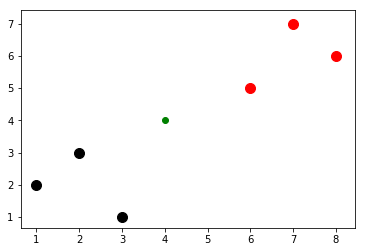

In [199]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], color='green')
plt.show()

In [206]:
for i in dataset:
    for j in dataset[i]:
        print(i, j)

k [1, 2]
k [2, 3]
k [3, 1]
r [6, 5]
r [7, 7]
r [8, 6]


In [231]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups.')
        
    distances = []
    for group in data:
        for features in data[group]:
            eucl_dist = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([eucl_dist, group])
#     print(distances)
            
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
#     print(vote_result, confidence)
    
    return vote_result, confidence

In [232]:
result, confidence = k_nearest_neighbors(dataset, new_features, 3)
print(result, confidence)

k 0.6666666666666666


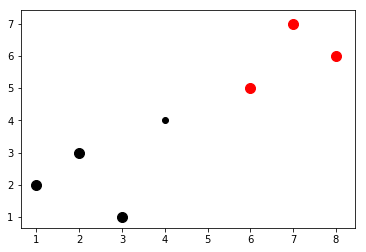

In [233]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], color=result)
plt.show()

In [251]:
colnames = ['id', 0, 1, 2, 3, 4, 5,
           6, 7, 8, 'class']
path_cancer = os.path.join(cwd, "data/breast-cancer-wisconsin.txt")
df_cancer = pd.read_csv(path_cancer, names=colnames)
print(df_cancer.shape)

(699, 11)


In [252]:
df_cancer.replace('?', -99999, inplace=True)
df_cancer.drop(['id'], 1, inplace=True)

full_data = df_cancer.astype(float).values.tolist()
print(full_data[:2])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0]]


In [253]:
random.shuffle(full_data)
print(20*'#')
print(full_data[:2])

####################
[[10.0, 4.0, 6.0, 1.0, 2.0, 10.0, 5.0, 3.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [264]:
for i in range(10):
    accuracies = []
    neighbors = random.randint(0, len(colnames)+1)

    test_size = 0.4
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])

    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors(train_set, data, neighbors)
            if group == vote:
                correct += 1
            total += 1
    print(f'K = {neighbors} Accuracy: {round(correct/total, 6)}')
    accuracies.append(correct/total)

print(f'Aggregated Accuracies: {sum(accuracies) / len(accuracies)}')

/Users/marktblack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: K is set to a value less than total voting groups.
  This is separate from the ipykernel package so we can avoid doing imports until


K = 2 Accuracy: 0.946237
K = 10 Accuracy: 0.960573
K = 3 Accuracy: 0.964158
K = 5 Accuracy: 0.960573
K = 12 Accuracy: 0.960573
K = 10 Accuracy: 0.960573
K = 11 Accuracy: 0.956989
K = 2 Accuracy: 0.946237
K = 5 Accuracy: 0.960573
K = 9 Accuracy: 0.960573
Aggregated Accuracies: 0.9605734767025089


In [265]:
from sklearn import preprocessing, cross_validation, neighbors

X = np.array(df_cancer.drop(['class'], 1))
y = np.array(df_cancer['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f'sklearn KNN accuracy: {accuracy}')

sklearn KNN accuracy: 0.9714285714285714
